In [83]:
#La Potencia viene dada por la siguiente formula

$P = \frac{\rho}{2}(V+wV)^2VCdA+(Cr+\%)mgV$

Dónde:

P es la potencia necesaria

$\rho$ es la densidad del aire

V es la velocidad

wV es velocidad el viento

Cd es el coeficiente de drag

A es el área efectiva

Cr es el coeficiente de rozamiento

$\%$ es la pendiente

m es la masa total del conjunto bicicleta - ciclista

In [84]:
import os
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn')
import numpy as np


### Cargamos los datos

In [85]:
path = '../Machine Learning/20180406_LEVS_195_90_R_E_ml_pca_clust.csv'

In [86]:
df = pd.read_csv(path)

In [87]:
df.head()

,Unnamed: 0,pwr,spd,porc,viento_aparente,k-means,gaussian
0,0,0.0,5.000000,0.000000,0.000000,2,1
1,1,0.0,5.141748,-11.731324,9.363222,2,1
2,2,0.0,5.200000,1.398533,9.817220,2,1
3,3,0.0,5.238999,-11.945909,9.986843,2,1
4,4,0.0,5.300000,-3.689984,9.813719,2,1


In [88]:
# Hacemos que la target sea el pwr solo por ver como funciona el modelo. Luego habrá que despejar y calcular spd

In [89]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
df_lm = df[['pwr','spd','porc','viento_aparente']]

In [91]:
df_lm_x = df[['spd','porc','viento_aparente']]
df_lm_y = df[['pwr']]

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_lm_x, df_lm_y, test_size=0.30, random_state=42)

In [93]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

In [95]:
X_test.describe()

,spd,porc,viento_aparente
count,2276.000000,2276.000000,2276.000000
mean,8.562566,0.440846,0.065414
std,4.680213,6.050870,7.347927
min,0.500000,-22.513542,-10.000000
25%,4.400000,-3.451678,-8.105006
50%,7.900000,0.000000,0.492105
75%,11.600000,4.587041,7.570282
max,22.700001,33.437843,10.000000


In [96]:
Y_test.describe()

,pwr
count,2276.000000
mean,157.062295
std,99.371667
min,0.000000
25%,77.664229
50%,184.414847
75%,235.942341
max,412.901105


Coefficients: 
 [[-9.90754219  4.89970779  1.0293756 ]]
Mean squared error: 4821.96
Variance score: 0.51


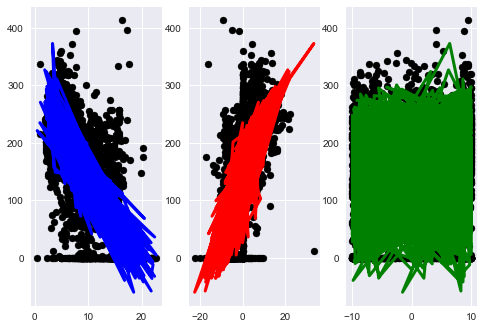

In [97]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

# Plot outputs
plt.subplot(131)
plt.scatter(X_test['spd'], Y_test,  color='black')
plt.plot(X_test['spd'], Y_pred, color='blue', linewidth=3)
plt.grid(True)

plt.subplot(132)
plt.scatter(X_test['porc'], Y_test,  color='black')
plt.plot(X_test['porc'], Y_pred, color='red', linewidth=3)
plt.grid(True)

plt.subplot(133)
plt.scatter(X_test['viento_aparente'], Y_test,  color='black')
plt.plot(X_test['viento_aparente'], Y_pred, color='green', linewidth=3)
plt.grid(True)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [98]:
#Probamos otra cosa. Vamos a darle al modelo calculados los terminos de la formula

$P = \frac{\rho}{2}(V+wV)^2VCdA+(Cr+\%)mgV$

$P = \frac{\rho}{2}(V+wV)^2VCdA+CrmgV+\%mgV$

In [99]:
#añadimos aqui
#df_lm_x = df[['spd','porc','viento_aparente']]
#df_lm_y = df[['pwr']]

df_lm_x['termino_cda'] = (df_lm_x['spd']+df_lm_x['viento_aparente'])**2*df_lm_x['spd']
df_lm_x['termino_roz'] = df_lm_x['spd']*90
df_lm_x['termino_cte'] = df_lm_x['spd']*df_lm_x['porc']*90

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [100]:
df_lm_x.describe()

,spd,porc,viento_aparente,termino_cda,termino_roz,termino_cte
count,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000
mean,8.369993,0.566121,0.019477,1656.010690,753.299377,-1306.478042
std,4.609740,6.021843,7.389041,3049.514249,414.876627,5209.575737
min,0.000000,-34.371736,-10.000000,0.000000,0.000000,-47317.457777
25%,4.300000,-3.167782,-8.096809,60.967664,387.000017,-2925.517635
50%,7.700000,0.000000,0.265508,435.095634,692.999983,0.000000
75%,11.445358,4.621375,7.617296,1740.384350,1030.082177,1815.265832
max,22.700001,37.473409,10.000000,23032.248422,2043.000069,15924.144553


In [101]:
df_lm_x2 = df_lm_x[['termino_cda','termino_roz','termino_cte']]
df_lm_y2 = df_lm_y[['pwr']]

In [102]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_lm_x2, df_lm_y2, test_size=0.30, random_state=42)

In [103]:
# Create linear regression object
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
# Make predictions using the testing set
Y_pred2 = regr2.predict(X_test2)

In [105]:
# The coefficients
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test2, Y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test2, Y_pred2))



Coefficients: 
 [[ 0.00381297 -0.14047982  0.00431919]]
Mean squared error: 4961.80
Variance score: 0.50


### Ridge

In [106]:
rid = linear_model.Ridge(alpha=0.5)

In [107]:
rid.fit(X_train2,Y_train2)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [108]:
Y_predict_rid = rid.predict(X_test2)

In [109]:
# The coefficients
print('Coefficients: \n', rid.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test2, Y_predict_rid))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test2, Y_predict_rid))

Coefficients: 
 [[ 0.00381297 -0.14047982  0.00431919]]
Mean squared error: 4961.80
Variance score: 0.50


In [110]:
rid2 = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])

In [111]:
rid2.fit(X_train2,Y_train2)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [112]:
Y_predict_rid2 = rid.predict(X_test2)

In [113]:
# The coefficients
print('Coefficients: \n', rid2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test2, Y_predict_rid2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test2, Y_predict_rid2))

Coefficients: 
 [[ 0.00381496 -0.14047915  0.00431468]]
Mean squared error: 4961.80
Variance score: 0.50


In [114]:
['pwr','spd','porc','viento_aparente']

['pwr', 'spd', 'porc', 'viento_aparente']

### Filtramos potencias >100w y <350w

In [115]:
df_lm2 = df.loc[(df['pwr']>100)&(df['pwr']<350)]

In [116]:
df_lm2

,Unnamed: 0,pwr,spd,porc,viento_aparente,k-means,gaussian
12,12,346.392776,9.413043,0.000000,10.000000,0,3
48,48,158.044348,10.348527,-2.940620,9.388696,3,2
49,49,236.809415,9.308396,-5.144776,8.321120,4,2
50,50,202.849728,8.682999,0.000000,5.525943,4,3
51,51,162.478184,8.286957,0.000000,3.815836,3,3
52,52,163.829990,8.200000,0.000000,2.631946,3,3
53,53,193.985165,8.329105,0.000000,3.101947,4,3
54,54,186.588235,8.400000,0.000000,2.683551,3,3
55,55,201.739139,8.411594,-0.659496,2.402648,4,4
56,56,218.510029,8.600000,-2.835846,2.683696,4,4


In [117]:
#añadimos aqui
df_lm_x2 = df_lm2[['spd','porc','viento_aparente']]
df_lm_y2 = df_lm2[['pwr']]

df_lm_x2['termino_cda'] = (df_lm2['spd']+df_lm2['viento_aparente'])**2*df_lm2['spd']
df_lm_x2['termino_roz'] = df_lm2['spd']*90
df_lm_x2['termino_cte'] = df_lm2['spd']*df_lm2['porc']*90

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [118]:
df_lm_x2.describe()

,spd,porc,viento_aparente,termino_cda,termino_roz,termino_cte
count,5402.000000,5402.000000,5402.000000,5402.000000,5402.000000,5402.000000
mean,6.699565,2.487753,0.418391,965.220744,602.960821,404.808461
std,3.561351,5.296708,7.260051,1677.506873,320.521586,3250.353410
min,0.439342,-20.818988,-10.000000,0.000003,39.540761,-32524.440529
25%,3.745649,0.000000,-7.433163,49.786516,337.108391,0.000000
50%,5.800000,0.000000,1.190306,319.562387,522.000017,0.000000
75%,8.800000,6.664519,7.810010,1011.207380,792.000017,2406.217902
max,20.299999,24.651806,10.000000,16951.981655,1826.999931,12783.109478


In [119]:
df_lm_y2.describe()

,pwr
count,5402.000000
mean,210.895992
std,51.928825
min,100.271595
25%,172.786927
50%,216.000000
75%,248.742291
max,348.710106


In [120]:
df_lm_x3 = df_lm_x2[['termino_cda','termino_roz','termino_cte']]
df_lm_y3 = df_lm_y2[['pwr']]

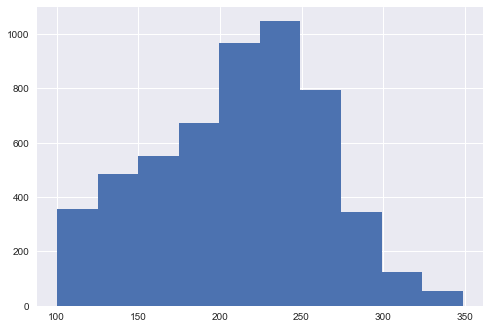

In [121]:
plt.hist(df_lm_y3['pwr'])
plt.show()

In [122]:
len(df_lm_x3)==len(df_lm_y3)

True

In [123]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df_lm_x3, df_lm_y3, test_size=0.30, random_state=42)

In [124]:
# Create linear regression object
regr3 = linear_model.LinearRegression()

# Train the model using the training sets
regr3.fit(X_train3, Y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
# Make predictions using the testing set
Y_pred3 = regr3.predict(X_test3)

In [126]:
# The coefficients
print('Coefficients: \n', regr3.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test3, Y_pred3))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test3, Y_pred3, multioutput='variance_weighted'))



Coefficients: 
 [[ 0.00627273 -0.0789689   0.0028103 ]]
Mean squared error: 2091.11
Variance score: 0.24


In [127]:
results = pd.DataFrame(X_test3)

In [128]:
 results['Y_test'] = Y_test3

In [129]:
 results['Y_pred'] = Y_pred3

In [130]:
results['dif'] = results['Y_test']-results['Y_pred']

(array([  56.,  197.,  420.,  593.,  266.,   70.,   17.,    1.,    0.,    1.]),
 array([-125.01080654,  -85.38443589,  -45.75806525,   -6.1316946 ,
          33.49467605,   73.1210467 ,  112.74741734,  152.37378799,
         192.00015864,  231.62652929,  271.25289994]),
 <a list of 10 Patch objects>)

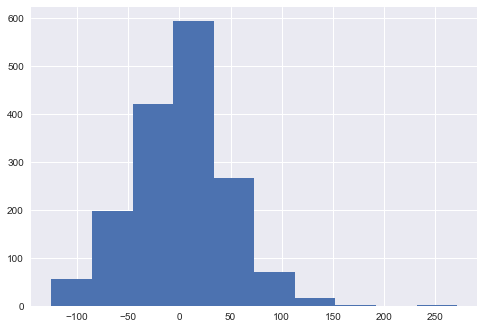

In [131]:
plt.hist(results['dif'])

In [132]:
from sklearn import metrics

In [133]:
metrics.explained_variance_score(Y_test3, Y_pred3)

0.24311839194236484

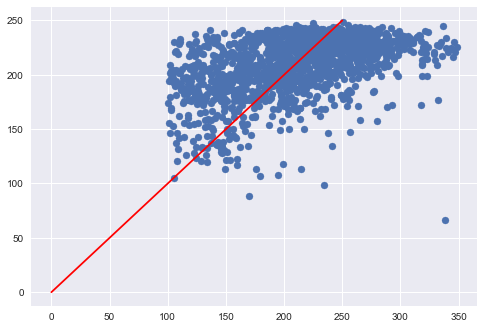

In [134]:
plt.scatter(Y_test3, Y_pred3)
plt.plot( [0,250],[0,250], c="red" )